In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
import geocoder
import json
import urllib
import urllib.request
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer

The Point of this notebook is to look at which attribute is the best predictor for the type of bikes

In [2]:
bikes=pd.read_csv('bikes_full_SF_Feb_ml.csv', error_bad_lines=False)
elevation=pd.read_csv('elevation_sf.csv', error_bad_lines=False)

In [3]:
elevation.set_index('station_id',inplace=True)
elevation

,SF-M26,SF-M25,SF-M26-2,SF-L27,SF-K26,SF-J27,SF-M30,SF-L27-2,SF-J29-3,SF-J29,...,SF-Z7,SF-Z6,SF-W8,SF-BB17,SF-AA15,SF-Z16,SF-Y14,SF-X14,SF-X19,SF-Y25
station_id,,,,,,,,,,,,,,,,,,,,,
SF-M26,0.0,3.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,...,28.0,19.0,50.0,52.0,59.0,44.0,87.0,90.0,25.0,15.0
SF-M25,-3.0,0.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,-11.0,...,25.0,16.0,47.0,49.0,56.0,41.0,84.0,87.0,22.0,12.0
SF-M26-2,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
SF-L27,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
SF-K26,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,27.0,58.0,60.0,67.0,52.0,95.0,98.0,33.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF-Z16,-44.0,-41.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,-52.0,...,-16.0,-25.0,6.0,8.0,15.0,0.0,43.0,46.0,-19.0,-29.0
SF-Y14,-87.0,-84.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,...,-59.0,-68.0,-37.0,-35.0,-28.0,-43.0,0.0,3.0,-62.0,-72.0
SF-X14,-90.0,-87.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,...,-62.0,-71.0,-40.0,-38.0,-31.0,-46.0,-3.0,0.0,-65.0,-75.0


In [4]:
bikes['started_at']=pd.to_datetime(bikes['started_at'],errors='coerce')
bikes['ended_at']=pd.to_datetime(bikes['ended_at'],errors='coerce')
bikes['start_hour']=bikes['started_at'].dt.hour
bikes['end_hour']=bikes['ended_at'].dt.hour
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1.180490e+06,400.0,2951.224312,19,19
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3.037043e+06,1522.0,1995.429149,10,11
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,7.396375e+05,418.0,1769.467733,13,13
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1.273815e+06,1513.0,841.913402,18,18
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,9.587779e+05,337.0,2845.038145,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1209.0,2891.959774,6,6
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,923.0,3788.059986,6,6
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,974.0,3589.711876,6,6
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1055.0,3314.103665,6,6


In [11]:
elevation.loc['SF-M26']['SF-M25']

3.0

In [5]:
bikes['type_num']=0
bikes['type_num']=[1 if x=='classic_bike' else 0 for x in bikes['rideable_type']]
bikes

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,displacement,duration,velocity,start_hour,end_hour,type_num
0,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member,1.180490e+06,400.0,2951.224312,19,19,1
1,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member,3.037043e+06,1522.0,1995.429149,10,11,1
2,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member,7.396375e+05,418.0,1769.467733,13,13,0
3,EF8B274C5CD4559E,electric_bike,2021-02-22 18:24:57,2021-02-22 18:50:10,Utah St at 24th St,SF-Q26,24th St at Bartlett St,SF-Q23-3,37.753243,-122.405496,37.752131,-122.419883,member,1.273815e+06,1513.0,841.913402,18,18,0
4,A896A2BE15365157,classic_bike,2021-02-22 13:16:00,2021-02-22 13:21:37,19th St at Florida St,SF-O25-1,16th St Mission BART Station 2,SF-N22-1B,37.760437,-122.410778,37.764854,-122.420129,member,9.587779e+05,337.0,2845.038145,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,6CC0C441607E4BAB,classic_bike,2021-02-18 06:02:39,2021-02-18 06:22:48,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1209.0,2891.959774,6,6,1
60275,ECC333B00108B2EB,classic_bike,2021-02-27 06:25:11,2021-02-27 06:40:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,923.0,3788.059986,6,6,1
60276,63971FE6AFC02507,classic_bike,2021-02-25 06:25:20,2021-02-25 06:41:34,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,974.0,3589.711876,6,6,1
60277,D343E2081AB58E27,classic_bike,2021-02-28 06:13:37,2021-02-28 06:31:12,Fell St at Stanyan St,SF-K15-,17th & Folsom Street Park (17th St at Folsom St),SF-N23,37.771954,-122.453703,37.763720,-122.415400,member,3.496379e+06,1055.0,3314.103665,6,6,1


Create a Column for quantifiable predction, if bike is classic then 1 else 0

Checking accuracy for displacement.

In [26]:
X

,ele_diff
0,7.0
1,8.0
2,6.0
3,8.0
4,2.0
...,...
60274,-71.0
60275,-71.0
60276,-71.0
60277,-71.0


In [27]:
Y

,type_num
0,1
1,1
2,0
3,0
4,1
...,...
60274,1
60275,1
60276,1
60277,1


In [28]:
X_scale = (X-X.mean())/X.std()

In [13]:
lr = LogisticRegression(fit_intercept=True)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42) 

Randomly divide into train and test dataset

In [15]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [16]:
preds=lr.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
score = lr.score(X_test, Y_test)
score

0.5619193762441937

Very Low accuracy for the logistic regression.

In [18]:
bikes['disp_norm']=(bikes['displacement']-bikes['displacement'].mean())/bikes['displacement'].std()

<AxesSubplot:xlabel='disp_norm', ylabel='type_num'>

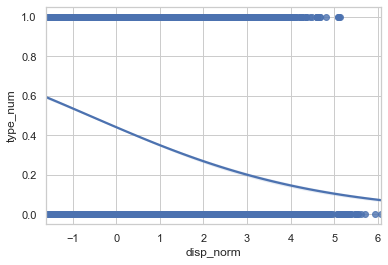

In [19]:
sns.regplot(x='disp_norm', y='type_num', data=bikes,logistic=True)

The probability Curve.

In [20]:
X=pd.DataFrame(bikes['duration'])
Y=pd.DataFrame(bikes['type_num'])

Now For Duration

In [21]:
X_scale = (X-X.mean())/X.std()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42) 

In [23]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [24]:
preds=lr.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
score = lr.score(X_test, Y_test)
score

0.5619193762441937

Even lower than Displacement.

In [26]:
X=pd.DataFrame(bikes['velocity'])
Y=pd.DataFrame(bikes['type_num'])

Now For velocity.

In [27]:
X_scale = (X-X.mean())/X.std()

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.4,random_state=42) 

In [29]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [30]:
preds=lr.predict(X_test)
preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [31]:
score = lr.score(X_test, Y_test)
score

0.6670122760451228

A decent improvement over prev 2

In [32]:
X=pd.DataFrame(bikes['start_station_id'])
Y=pd.DataFrame(bikes['type_num'])

Now using start station id, Since its in string form, bring it to one hot encoding

In [33]:
X=pd.get_dummies(X)
X

,start_station_id_BK-A3,start_station_id_BK-A7,start_station_id_BK-B7,start_station_id_BK-C1,start_station_id_BK-C5,start_station_id_BK-C6,start_station_id_BK-C7,start_station_id_BK-C8,start_station_id_BK-C9,start_station_id_BK-D1,...,start_station_id_SJ-P7,start_station_id_SJ-P8,start_station_id_SJ-P9,start_station_id_SJ-Q10,start_station_id_SJ-Q11,start_station_id_SJ-Q4,start_station_id_SJ-Q5,start_station_id_SJ-Q8,start_station_id_SJ-Q9,start_station_id_SJ-R11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [35]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [36]:
score = lr.score(X_test, Y_test)
score

0.6514183808891838

Starting position gives better acc than Displacement and duration, probably due to lack of E-bikes at certain stations.

In [37]:
X=pd.DataFrame(bikes['end_station_id'])
Y=pd.DataFrame(bikes['type_num'])

In [38]:
X=pd.get_dummies(X)
X

,end_station_id_BK-A3,end_station_id_BK-A7,end_station_id_BK-B7,end_station_id_BK-C1,end_station_id_BK-C5,end_station_id_BK-C6,end_station_id_BK-C7,end_station_id_BK-C8,end_station_id_BK-C9,end_station_id_BK-D1,...,end_station_id_SJ-P7,end_station_id_SJ-P8,end_station_id_SJ-P9,end_station_id_SJ-Q10,end_station_id_SJ-Q11,end_station_id_SJ-Q4,end_station_id_SJ-Q5,end_station_id_SJ-Q8,end_station_id_SJ-Q9,end_station_id_SJ-R11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [40]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [41]:
score = lr.score(X_test, Y_test)
score

0.6567684140676842

Almost same acc as Start Id

In [42]:
X=pd.DataFrame(bikes['start_hour'])
Y=pd.DataFrame(bikes['type_num'])

For Starting Hour

In [43]:
hour_encoder =LabelBinarizer()
hour_encoder.fit(X)
transformed = hour_encoder.transform(X)
X = pd.DataFrame(transformed)
X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [45]:
lr.fit(X_train,Y_train)

C:\Users\kshit\anaconda3\envs\Kshitij\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [46]:
score = lr.score(X_test, Y_test)
score

0.5551177836761778

So the best predictor for bike type right now is velocity followed very closely by start_id, it would be interesting to see how altitude performs for a city like SF

In [47]:
X=pd.DataFrame(bikes['start_station_id'])
Y=pd.DataFrame(bikes['type_num'])

Trying Start Id for denser neural network.

In [48]:
X=pd.get_dummies(X)
X

,start_station_id_BK-A3,start_station_id_BK-A7,start_station_id_BK-B7,start_station_id_BK-C1,start_station_id_BK-C5,start_station_id_BK-C6,start_station_id_BK-C7,start_station_id_BK-C8,start_station_id_BK-C9,start_station_id_BK-D1,...,start_station_id_SJ-P7,start_station_id_SJ-P8,start_station_id_SJ-P9,start_station_id_SJ-Q10,start_station_id_SJ-Q11,start_station_id_SJ-Q4,start_station_id_SJ-Q5,start_station_id_SJ-Q8,start_station_id_SJ-Q9,start_station_id_SJ-R11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=42) 

In [224]:
model = Sequential()
model.add(Dense(900, input_dim=453, activation='relu'))
model.add(Dense(450, activation='relu'))
model.add(Dense(225, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=32, epochs=10)

Epoch 1/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.6383 - accuracy: 0.6240
Epoch 2/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5981 - accuracy: 0.6549
Epoch 3/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5950 - accuracy: 0.6567
Epoch 4/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5986 - accuracy: 0.6567
Epoch 5/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5963 - accuracy: 0.6574
Epoch 6/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.5884 - accuracy: 0.6598
Epoch 7/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5921 - accuracy: 0.6631
Epoch 8/10
1131/1131 [==============================] - 4s 4ms/step - loss: 0.5895 - accuracy: 0.6605
Epoch 9/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.5935 - accuracy: 0.6557
Epoch 10/10
1131/1131 [==============================] - 5s 4ms/step - loss: 0.591

In [225]:
model.evaluate(X_test,Y_test)

754/754 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6505


[0.6056023240089417, 0.6505059599876404]

As can be seen even for a complex neural net, the acc for Start Id remains the same.